# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/yaqiongzhang/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


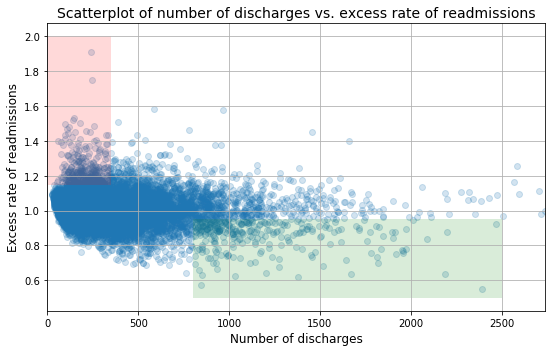

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## A. Do you agree with the above analysis and recommendations? Why or why not?     
The preliminary analysis based on the scattering plot give me some idea of the problem. But the analysis can't support the conclusion well. Here is my critiques:

1. There is no hypothesis testing and statistical analysis to support the conclusion.
2. They drop the data where there is missing value or there is outlier. It's better to investigate the reason for those extreme cases. For example, they can call those hospitals to see if they are permenately closed.
3. In the statistic part, data from number of discharge less than 100 was calculated, but they give recommendation based on that number less than 300.

## B. Provide support for your arguments and your own recommendations with a statistically sound analysis
### about the dataset:
- There are 11578 rows in this dataset. 
- The column named "predicted readmission rate" equals the number of readmission/number of discharge.
- There are only 2921 unique hospitals. There are some hospitals measured for multiple times and they are multiple rows each have different "Measure Name".


In [59]:
df = clean_hospital_read_df

#I assume the rows with same hospital names, state and number of discharges are from the same hospital.
#So I average the result from all the measures together for the same hospital with multiple measurements. 

df_group = df.groupby(['Hospital Name','State','Number of Discharges'])['Excess Readmission Ratio'].mean().reset_index()
print('The number of hospitals:',len(df_group))

The number of hospitals: 11533


In [60]:
df_group.head()

,Hospital Name,State,Number of Discharges,Excess Readmission Ratio
0,ABBEVILLE GENERAL HOSPITAL,LA,44,1.0198
1,ABBEVILLE GENERAL HOSPITAL,LA,163,1.0284
2,ABBEVILLE GENERAL HOSPITAL,LA,206,1.1315
3,ABBOTT NORTHWESTERN HOSPITAL,MN,281,0.9452
4,ABBOTT NORTHWESTERN HOSPITAL,MN,294,0.9741


In [61]:
df_group.tail()

,Hospital Name,State,Number of Discharges,Excess Readmission Ratio
11528,YUMA REGIONAL MEDICAL CENTER,AZ,631,0.8834
11529,YUMA REGIONAL MEDICAL CENTER,AZ,633,0.9514
11530,YUMA REGIONAL MEDICAL CENTER,AZ,835,1.0590
11531,YUMA REGIONAL MEDICAL CENTER,AZ,1007,1.0760
11532,ZUNI COMPREHENSIVE COMMUNITY HEALTH CENTER,NM,0,NaN


## B1: Setup an appropriate hypothesis test.
*Null hypothesis:* the excess readmission ratio is the same for the hospitals with less than 300 (small hospital) discharge number and the hospitals with larger than 300 discharge number (large hospital).

*Alternative hypothesis* is that the two groups of hospitals have significantly different excess readmission ratio.

The testing method is two sample t-test for equal mean.

In [62]:
#before the test, clean the data
#https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
df = df_group[np.isfinite(df_group['Excess Readmission Ratio'])]
df['Excess Readmission Ratio'].isnull().sum()

0

In [63]:
# test I chose two sample t test
import scipy.stats as stats
data_less = df.loc[df['Number of Discharges']<=300]
data_more = df.loc[df['Number of Discharges']>300]

stats.ttest_ind(data_less['Excess Readmission Ratio'],data_more['Excess Readmission Ratio'])

Ttest_indResult(statistic=8.4780701436389894, pvalue=2.5695980428523767e-17)

## B2 Compute and report the observed significance value (or p-value).
The t test score is 8.48, is greater than the critical value 1.97, so we reject the null hypothesis and conclude that the two population means at 0.05 significance level.

[two sample t-test](http://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm)

## B3 Report statistical significance for  $\alpha$ = .01.
The p-value = 3.86e-18 << 0.01, our result remain statistical significance for  $\alpha$ = .01.

## 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
Statistical significance menas that differences in group means are not likely due to sample error. However, when the sample's size is very large, even the difference is small, there will have statistical significance. Here in this case, the sample size is over 10,000, so it's large enough to have statistical significance with small diferences. 

Practical significance asks the question that whether the difference between samples really big enough to have real meaning. In this case, practical significance need more investigation. The correlation coefficient (calculated in the following scattering plot) is -0.097, indicating a weak relationship between the excess readmission ratio and the number of discharge. 

## 5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.
      
**Advantage**
The scattering plot with the red and green area box give me some guess about the relationship between the excess readmission ratio and the number of discharge.

**Disadvantage**
There are too much overlapping between dots, and we can't tell how many dots actually are in there. 

In my plot, I add a regression line and histogram. In addition, I add analysis taking the state's difference into account.

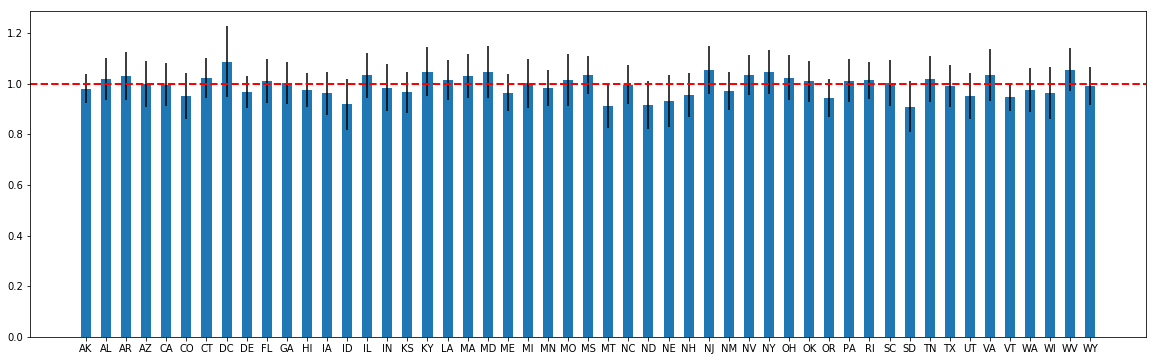

In [64]:
df_mean = df_group.groupby('State')['Excess Readmission Ratio'].mean().reset_index()
df_std = df_group.groupby('State')['Excess Readmission Ratio'].std().reset_index()

y = [a for a in df_mean['Excess Readmission Ratio']]
y_err = [b for b in df_std['Excess Readmission Ratio']]
x = [c for c in df_mean['State']]

fig,ax= plt.subplots()
ax.bar(np.arange(len(y)), y, width=0.5, yerr=y_err)

ax.set_xticks(np.arange(len(y)))
ax.set_xticklabels(x)

plt.axhline(1,color='r', linestyle='dashed',linewidth=2)
plt.rcParams['figure.figsize']={20,6}

From the above plot, we can see some state have higher excess readmission ratio. So let's take a close look at the date from State DC.

In [ ]:
#https://stackoverflow.com/questions/27018622/pandas-groupby-sort-descending-order/36316186
df_ =clean_hospital_read_df[81:-3].groupby('State')['Excess Readmission Ratio'].mean().plot(kind='bar',figsize=[20,10])

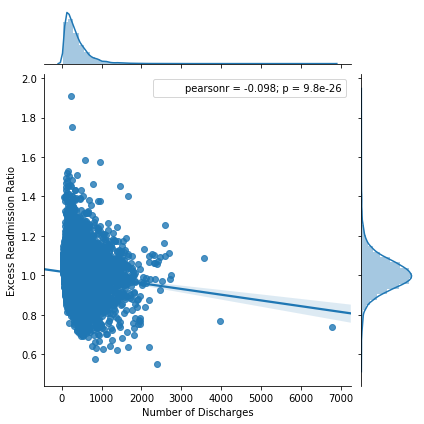

In [65]:
df_dc = df_group[df_group.State=='DC']
df_sd = df_group[df_group.State=='SD']
import seaborn as sns
sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_group, kind='reg')

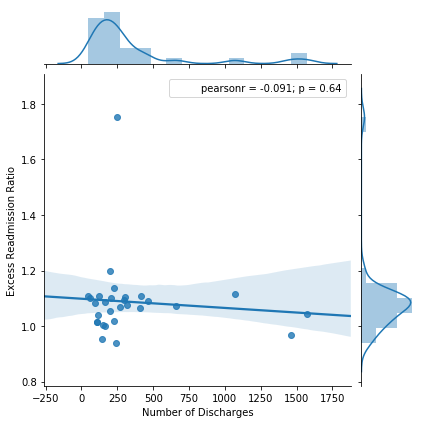

In [66]:
#State DC

sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_dc, kind='reg')

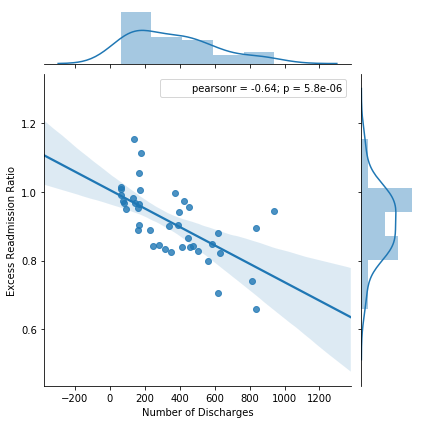

In [67]:
# State SD 

sns.jointplot('Number of Discharges', 'Excess Readmission Ratio', data=df_sd, kind='reg')

### Conclusion:
From the hypothesis testing, the mean excess readmission ration of the groups of hospital are different with statistical significance. But as discussed above, this does not mean the there is a practical significance here. More investigation is needed for making recommendation with practical significance.

From the state's analysis, the ratio do varies between different state. So, future investigation may want to look at each state and make recommendation for each state differently.